In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df = pd.read_csv("Car_data.csv")

In [93]:
df.head(10)

,ID,Brand,Model,Year,Color,Mileage,Price,Condition
0,1,Mazda,Generic Model 3,2003,Blue,22932,65732,New
1,2,Jaguar,Generic Model 2,2003,Silver,89937,58620,New
2,3,Land Rover,Generic Model 2,2022,Green,36616,50574,New
3,4,Porsche,Generic Model 2,1997,Black,82812,35436,Used
4,5,Land Rover,Generic Model 3,2000,Black,184616,63880,Used
5,6,Porsche,Generic Model 2,1997,Blue,96785,42794,New
6,7,Volvo,Generic Model 3,2003,Silver,177385,58082,Used
7,8,Chevrolet,Generic Model 3,1997,Blue,47226,31079,Used
8,9,Ford,Focus,2003,Black,176272,59437,Used
9,10,Hyundai,Generic Model 3,2014,Silver,6153,27767,New


In [78]:
df.describe

<bound method NDFrame.describe of            ID       Brand            Model  Year   Color  Mileage  Price  \
0           1       Mazda  Generic Model 3  2003    Blue    22932  65732   
1           2      Jaguar  Generic Model 2  2003  Silver    89937  58620   
2           3  Land Rover  Generic Model 2  2022   Green    36616  50574   
3           4     Porsche  Generic Model 2  1997   Black    82812  35436   
4           5  Land Rover  Generic Model 3  2000   Black   184616  63880   
...       ...         ...              ...   ...     ...      ...    ...   
99995   99996       Lexus  Generic Model 1  2018     Red    24034  31762   
99996   99997      Nissan  Generic Model 1  2015   Green    30029  78376   
99997   99998  Land Rover  Generic Model 1  2009   White    42313  45681   
99998   99999      Toyota           Tacoma  2010   White   120989  15085   
99999  100000  Volkswagen  Generic Model 2  2017    Blue   138318  22866   

      Condition  
0           New  
1           New  

In [79]:
df.isnull().sum()

ID           0
Brand        0
Model        0
Year         0
Color        0
Mileage      0
Price        0
Condition    0
dtype: int64

In [80]:
df.isnull().sum().sum()

0

In [94]:
df.info
data1 = df

In [82]:
df.drop(labels = ["ID"], axis = 1, inplace = True)

In [83]:
df["Brand"].unique()

array(['Mazda', 'Jaguar', 'Land Rover', 'Porsche', 'Volvo', 'Chevrolet',
       'Ford', 'Hyundai', 'Tesla', 'Lexus', 'Mercedes-Benz', 'Subaru',
       'Volkswagen', 'Audi', 'Honda', 'Jeep', 'BMW', 'Nissan', 'Kia',
       'Toyota'], dtype=object)

In [84]:
df.select_dtypes(include = ["object"]).nunique()

Brand        20
Model        21
Color         6
Condition     2
dtype: int64

ValueError: could not convert string to float: 'Mazda'

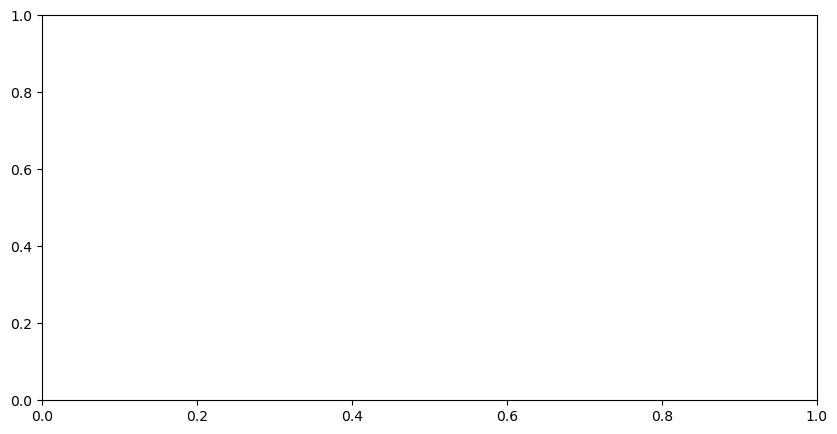

In [85]:
f, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(df.corr())

In [185]:
#from sklearn.preprocessing import QuantileTransformer
#df["Mileage"] = QuantileTransformer().fit_transform(df[["Mileage"]])
y = df["Price"]

X = df.drop(labels = ["Price", "ID"], axis = 1)
X["Mileage"] = X["Mileage"]/10000
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1)

In [177]:
from sklearn.preprocessing import OrdinalEncoder
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]
good_label_cols = [col for col in object_cols if set(X_valid[col]).issubset(set(X_train[col]))]
bad_label_cols = list(set(object_cols) - set(good_label_cols))

In [178]:
bad_label_cols

[]

In [186]:
X_train = X_train.drop(labels = bad_label_cols, axis = 1)
X_valid = X_valid.drop(labels = bad_label_cols, axis = 1)

ordinal_encoder = OrdinalEncoder()
X_train[good_label_cols] = ordinal_encoder.fit_transform(X_train[good_label_cols])
X_valid[good_label_cols] = ordinal_encoder.fit_transform(X_valid[good_label_cols])
data2 = pd.concat([X_train, y_train], axis = 1)
data2.head()

,Brand,Model,Year,Color,Mileage,Condition,Price
61088,3.0,10.0,2012,0.0,4.1479,1.0,31449
45462,0.0,11.0,2017,2.0,6.8701,1.0,39027
79281,6.0,11.0,2016,2.0,6.9769,0.0,71172
49005,8.0,13.0,2020,4.0,15.8221,0.0,57234
221,2.0,12.0,1993,2.0,1.4057,0.0,45024


<Axes: xlabel='Model', ylabel='Price'>

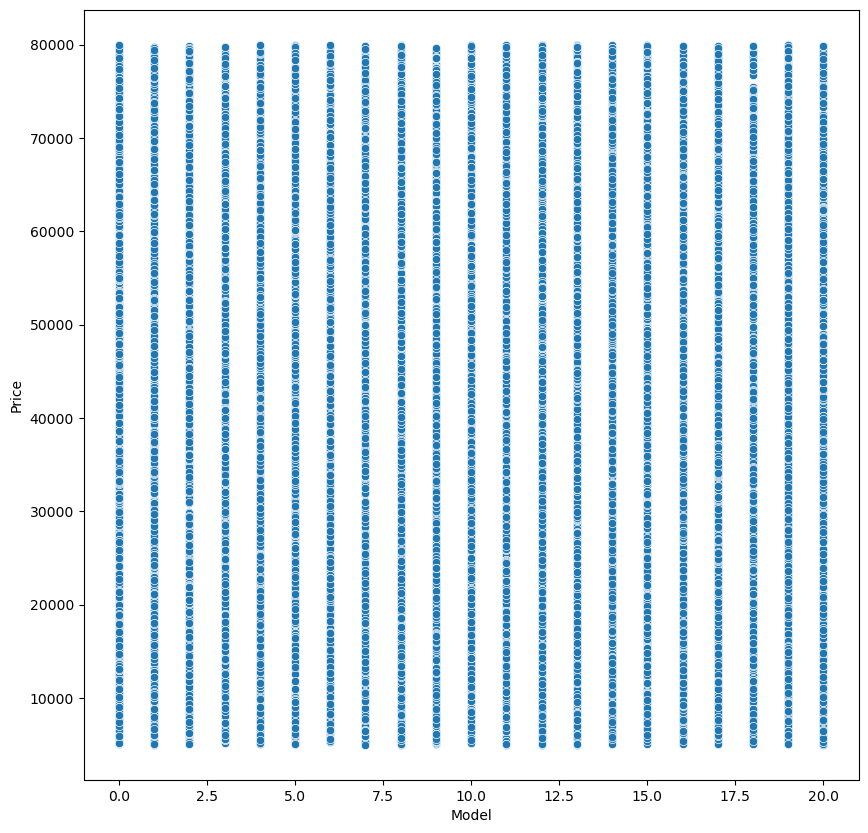

In [149]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = "Model", y = "Price", data = data2)

<Axes: xlabel='Model', ylabel='Price'>

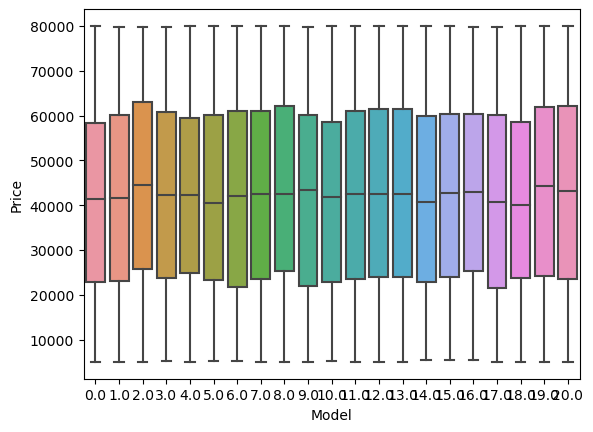

In [169]:
plt.figure()
sns.boxplot(x = "Model",  y = "Price", data = data2)

In [116]:
sns.heatmap(data1.corr(), annot = True, fmt = ".2f")

ValueError: could not convert string to float: 'Mazda'

In [180]:
X_train.head()

,Brand,Model,Year,Color,Mileage,Condition
14874,15.0,13.0,2.011,5.0,5.0814,1.0
17227,0.0,11.0,2.000,1.0,10.1721,1.0
6704,0.0,12.0,2.010,1.0,9.9303,1.0
83577,13.0,11.0,2.001,3.0,0.6002,1.0
44537,10.0,12.0,2.011,2.0,13.0145,0.0


E:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


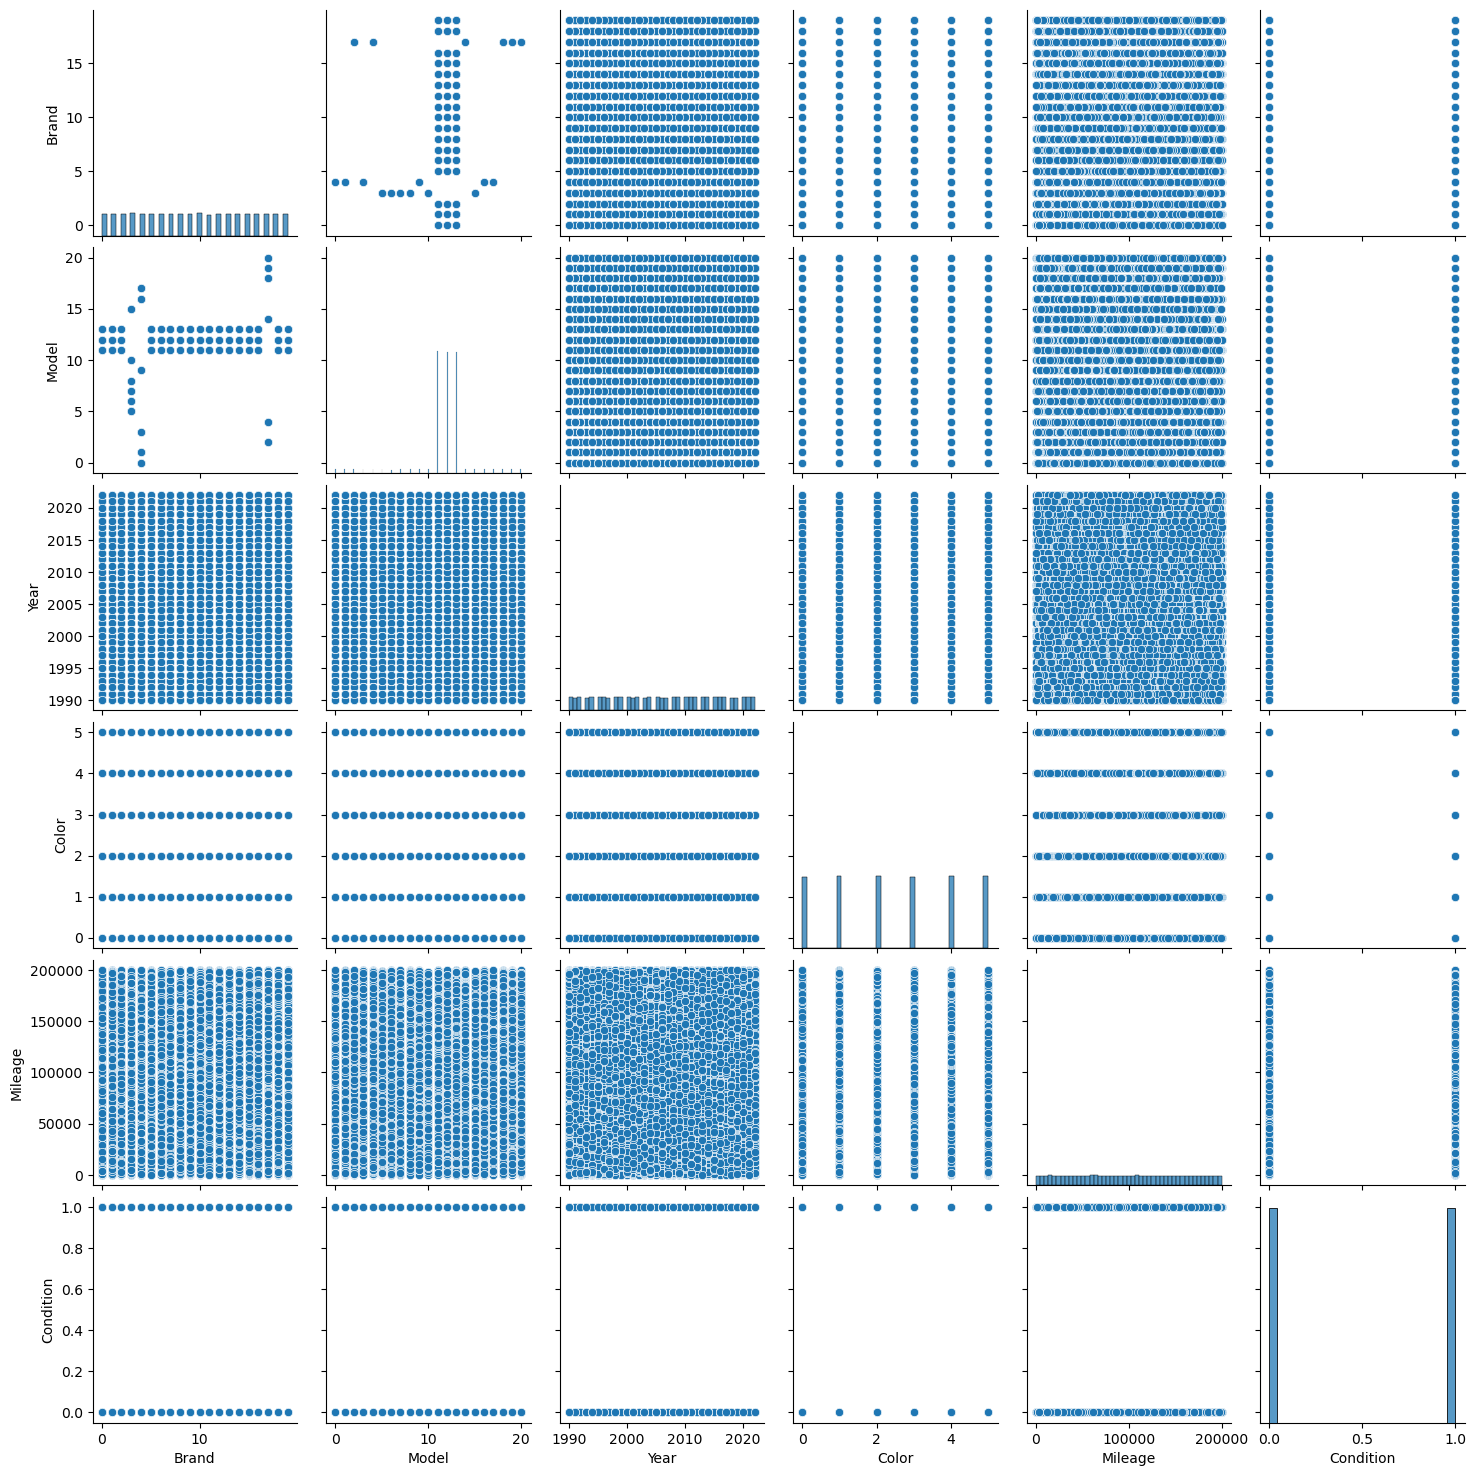

In [23]:
sns.pairplot(X_train)
plt.show()

In [117]:
data2.groupby('Model')['Price'].mean()

Model
0.0     41029.587919
1.0     42147.431169
2.0     44016.391304
3.0     42618.227749
4.0     42283.118509
5.0     41812.493557
6.0     40814.648069
7.0     42346.025221
8.0     42592.779851
9.0     41844.296104
10.0    41763.888011
11.0    42558.345185
12.0    42563.546216
13.0    42566.394158
14.0    41475.728011
15.0    42424.578065
16.0    42462.105263
17.0    41065.770718
18.0    41343.272265
19.0    43415.723785
20.0    42613.771812
Name: Price, dtype: float64

In [187]:
correlation_matrix = data2.corr()
correlation_matrix

,Brand,Model,Year,Color,Mileage,Condition,Price
Brand,1.000000,0.169235,-0.002196,0.002224,-0.003515,-0.003206,-0.002694
Model,0.169235,1.000000,0.000430,0.001301,0.006826,0.001284,0.000995
Year,-0.002196,0.000430,1.000000,-0.005113,-0.003879,0.005968,0.007303
Color,0.002224,0.001301,-0.005113,1.000000,0.002469,-0.008304,0.003229
Mileage,-0.003515,0.006826,-0.003879,0.002469,1.000000,0.005110,-0.001116
Condition,-0.003206,0.001284,0.005968,-0.008304,0.005110,1.000000,-0.000469
Price,-0.002694,0.000995,0.007303,0.003229,-0.001116,-0.000469,1.000000


In [172]:
X["Mileage"].head()

0     2.2932
1     8.9937
2     3.6616
3     8.2812
4    18.4616
Name: Mileage, dtype: float64

In [39]:
X["Mileage"].to_numpy().reshape(-1, 1).shape

(100000, 1)

In [188]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

models = [LinearRegression(), Lasso(alpha = 0.2), Ridge(alpha = 0.01)]
for model in models:
    model.fit(X_train, y_train)
    y_preds = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_preds)
    mse = mean_squared_error(y_valid, y_preds)
    print(model.coef_)
    r2 = r2_score(y_valid, y_preds)
    print(f"Model {model} has mae = {mae}, mse = {mse} and r2 = {r2}")

[-11.02425852  11.71576342  16.5850282   41.40683043  -4.17297371
 -21.22799144]
Model LinearRegression() has mae = 18724.43655241337, mse = 470039856.1233792 and r2 = 7.752031468311049e-05
[-11.01557082  11.68616384  16.58254564  41.34008653  -4.16716402
 -20.42941147]
Model Lasso(alpha=0.2) has mae = 18724.43825123855, mse = 470039874.81760496 and r2 = 7.748054619038935e-05
[-11.02425846  11.71576323  16.58502817  41.40682887  -4.1729737
 -21.22798204]
Model Ridge(alpha=0.01) has mae = 18724.436552434097, mse = 470039856.12341505 and r2 = 7.752031460694919e-05


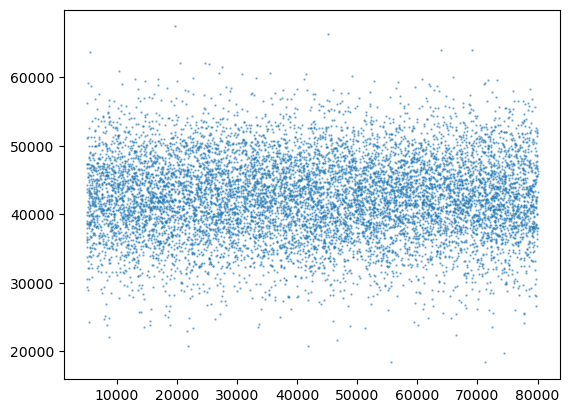

In [183]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_preds = model.predict(X_valid)
plt.scatter(y_valid, y_preds, s = 0.5, alpha = 0.5)

In [184]:
mae = mean_absolute_error(y_valid, y_preds)
mse = mean_squared_error(y_valid, y_preds)
r2 = r2_score(y_valid, y_preds)
print(f"Model {model} has mae = {mae}, mse = {mse} and r2 = {r2}")

Model RandomForestRegressor() has mae = 19107.34496, mse = 498425445.4480453 and r2 = -0.07386263122795222


In [189]:
print(model.predict([[3, 10, 2012, 0, 4.1479, 1.0]]))

[42591.92872487]


E:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
